In [1]:
import pandas as pd
import pymc3 as pm
from sklearn.linear_model import LinearRegression

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [2]:
df = pd.read_csv('~/data/shampooSales.csv')

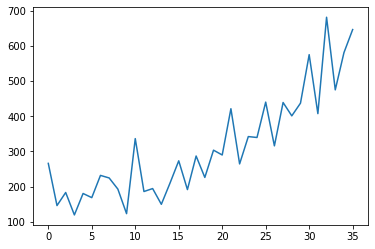

In [3]:
sales = df["Count"]
sales.plot()

In [4]:
X = df["Month"]
X = X.values.reshape([-1,1])

##### Build a linear model

In [5]:
lm = LinearRegression().fit(X, sales)

print("Linear Model:\n")
print("slope={:.2f}  intercept={:.2f}".format(lm.coef_[0], lm.intercept_))

Linear Model:

slope=12.08  intercept=101.22


##### Now treat the coefficients as random variables with mean and std

In [6]:
basic_model = pm.Model()

In [7]:
with basic_model:
    beta = pm.Normal("beta", mu=12, sd=10)
    alpha = pm.Normal("alpha", mu=101, sd=10)
    std = pm.Uniform("std", 0, 100)

In [9]:
with basic_model:
    mean = pm.Deterministic("mean", alpha + beta * X)

In [10]:
with basic_model:
    obs = pm.Normal("obs", mu=mean, sd=std, observed=sales)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [12]:
plt.style.use('seaborn-darkgrid')

In [13]:
x = np.linspace(-5, 5, 1000)
mus = [0., 0., 0., -2.]
sigmas = [0.2, 1., 2., 0.4]

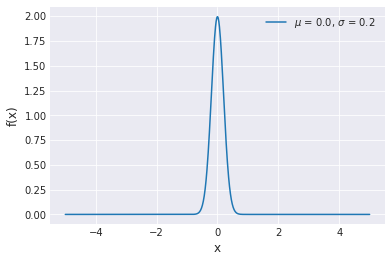

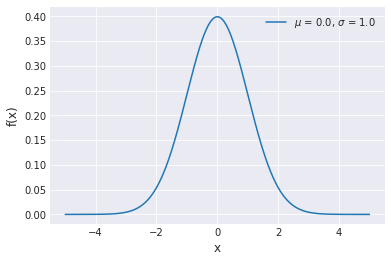

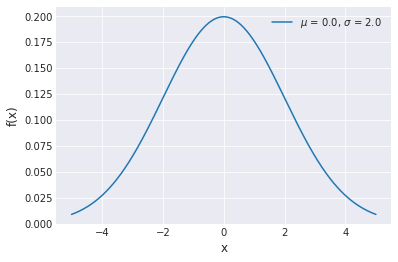

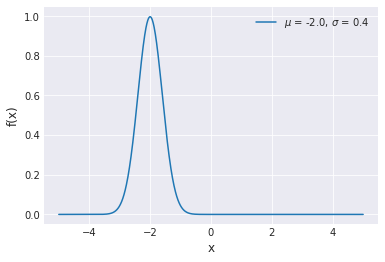

In [14]:
for mu, sigma in zip(mus, sigmas):
    pdf = st.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(mu, sigma))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.legend(loc=1)
    plt.show()